# Lab | Random variable distributions
## Cristian Valeria

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Get the numerical variables from our dataset.

In [3]:
cols = []
    
for col in data.columns:
    cols.append(col.lower().replace(' ', '_'))
data.columns = cols


In [4]:
data_numerical  = data.select_dtypes(exclude='object')

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [7]:
data_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

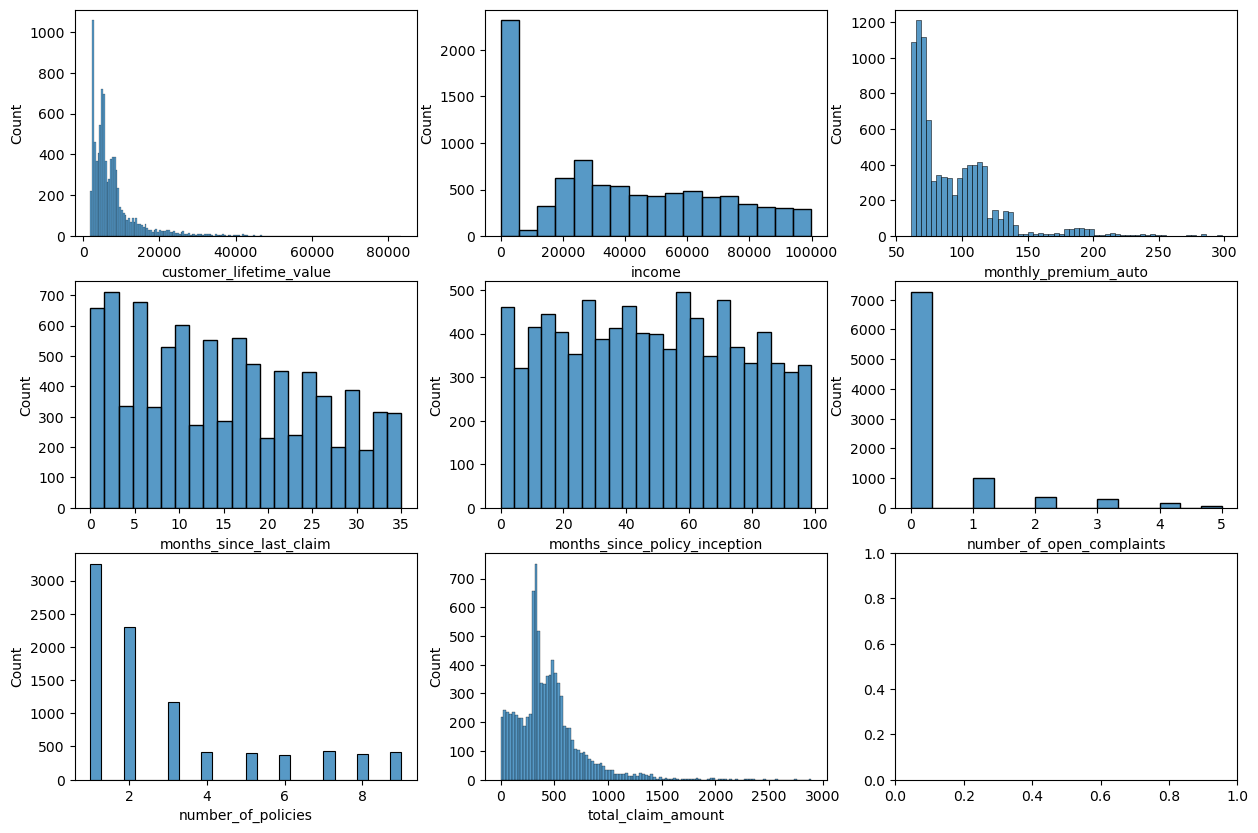

In [66]:
fig, ax = plt.subplots(3,3, figsize=(15,10))

sns.histplot(x='customer_lifetime_value', data = data_numerical, ax=ax[0,0])

sns.histplot(x='income', data = data_numerical, ax=ax[0,1])

sns.histplot(x='monthly_premium_auto', data = data_numerical, ax=ax[0,2])

sns.histplot(x='months_since_last_claim', data = data_numerical, ax=ax[1,0])

sns.histplot(x='months_since_policy_inception', data = data_numerical, ax=ax[1,1])

sns.histplot(x='number_of_open_complaints', data = data_numerical, ax=ax[1,2])

sns.histplot(x='number_of_policies', data = data_numerical, ax=ax[2,0])

sns.histplot(x='total_claim_amount', data = data_numerical, ax=ax[2,1])

plt.show()

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### a. Log Transformation

In [69]:
data_num_log = np.log(data_numerical)

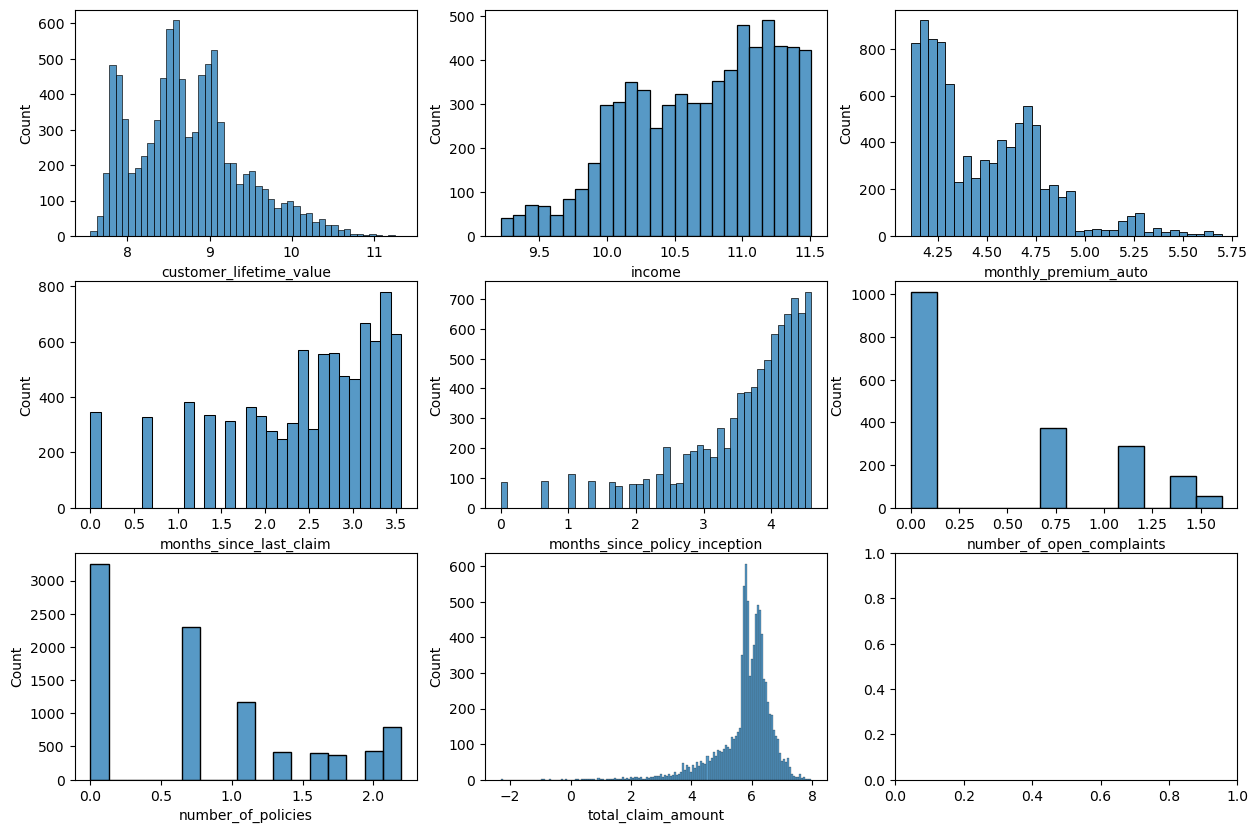

In [70]:
fig, ax = plt.subplots(3,3, figsize=(15,10))

sns.histplot(x='customer_lifetime_value', data = data_num_log, ax=ax[0,0])

sns.histplot(x='income', data = data_num_log, ax=ax[0,1])

sns.histplot(x='monthly_premium_auto', data = data_num_log, ax=ax[0,2])

sns.histplot(x='months_since_last_claim', data = data_num_log, ax=ax[1,0])

sns.histplot(x='months_since_policy_inception', data = data_num_log, ax=ax[1,1])

sns.histplot(x='number_of_open_complaints', data = data_num_log, ax=ax[1,2])

sns.histplot(x='number_of_policies', data = data_num_log, ax=ax[2,0])

sns.histplot(x='total_claim_amount', data = data_num_log, ax=ax[2,1])

plt.show()

it seems that just for customer_life_value is working but nor really making it considerably less skewed 

### b. Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_numerical)

MinMaxScaler()

In [74]:
scaler.transform(data_numerical)

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])

In [78]:
data_num_minmax = scaler.transform(data_numerical)

In [80]:
data_num_minmax  = pd.DataFrame(data_num_minmax, columns = data_numerical.columns)

In [81]:
data_num_minmax.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


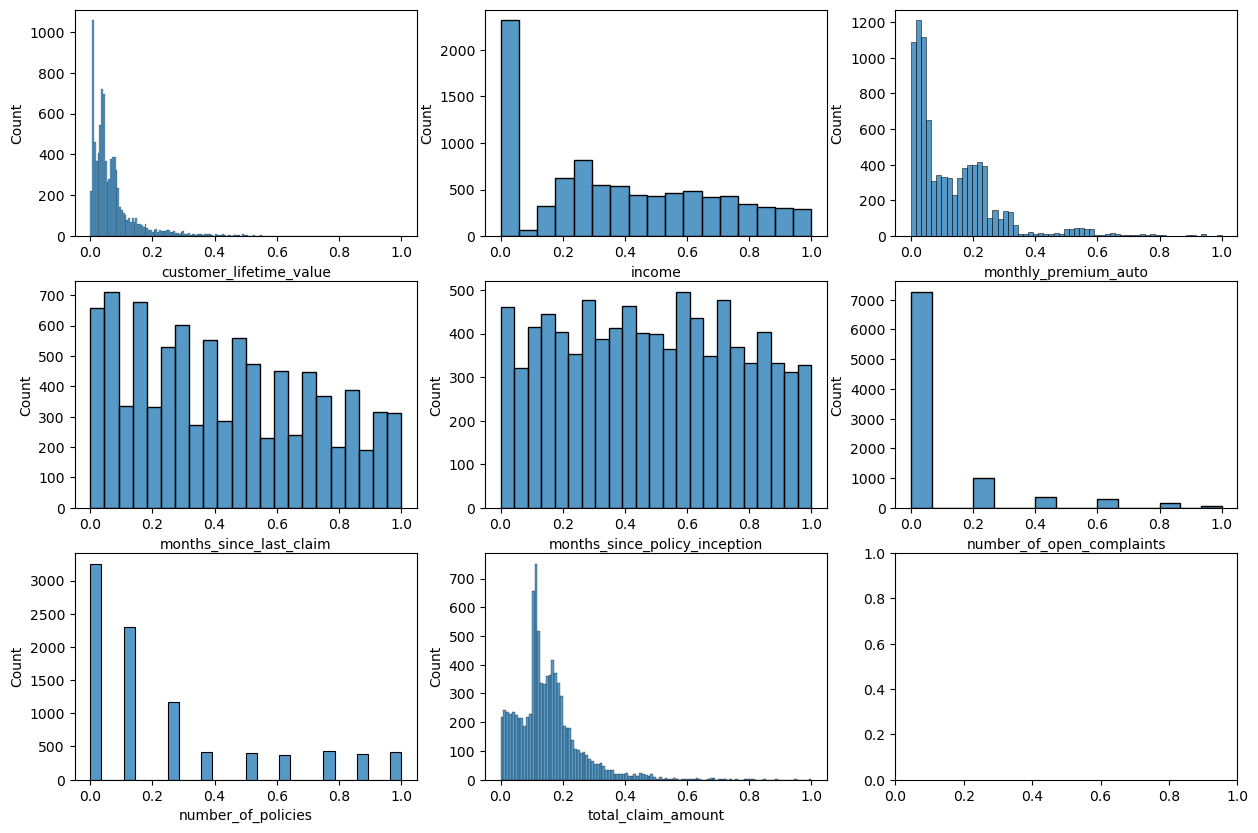

In [82]:
fig, ax = plt.subplots(3,3, figsize=(15,10))

sns.histplot(x='customer_lifetime_value', data = data_num_minmax, ax=ax[0,0])

sns.histplot(x='income', data = data_num_minmax, ax=ax[0,1])

sns.histplot(x='monthly_premium_auto', data = data_num_minmax, ax=ax[0,2])

sns.histplot(x='months_since_last_claim', data = data_num_minmax, ax=ax[1,0])

sns.histplot(x='months_since_policy_inception', data = data_num_minmax, ax=ax[1,1])

sns.histplot(x='number_of_open_complaints', data = data_num_minmax, ax=ax[1,2])

sns.histplot(x='number_of_policies', data = data_num_minmax, ax=ax[2,0])

sns.histplot(x='total_claim_amount', data = data_num_minmax, ax=ax[2,1])

plt.show()

In [83]:
# not big differents with original distributions

### c.Standarization

In [84]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler() 
transformer.fit(data_numerical)
data_scaled = transformer.transform(data_numerical) 
data_scaled  = pd.DataFrame(data_scaled,  columns = data_numerical.columns) #this because was a numpy array

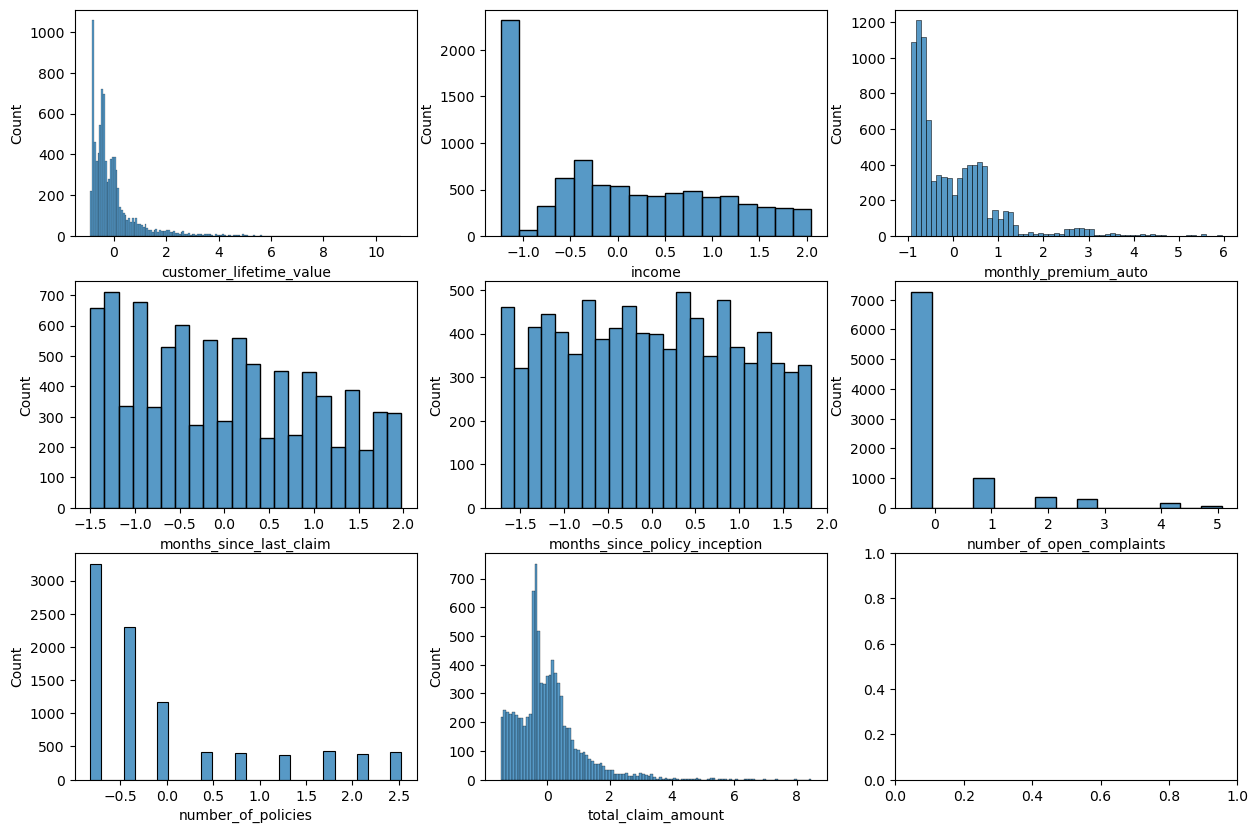

In [85]:
fig, ax = plt.subplots(3,3, figsize=(15,10))

sns.histplot(x='customer_lifetime_value', data = data_scaled, ax=ax[0,0])

sns.histplot(x='income', data = data_scaled, ax=ax[0,1])

sns.histplot(x='monthly_premium_auto', data = data_scaled, ax=ax[0,2])

sns.histplot(x='months_since_last_claim', data = data_scaled, ax=ax[1,0])

sns.histplot(x='months_since_policy_inception', data = data_scaled, ax=ax[1,1])

sns.histplot(x='number_of_open_complaints', data = data_scaled, ax=ax[1,2])

sns.histplot(x='number_of_policies', data = data_scaled, ax=ax[2,0])

sns.histplot(x='total_claim_amount', data = data_scaled, ax=ax[2,1])

plt.show()

In [86]:
# not big differents with original distributions